## 使用NumPy模拟随机抛硬币和掷骰子实验

### 分析无偏差硬币

在安装matplotlib的时候，作为matplotlib的依赖的NumPy已经被安装到Python环境中了。

但是可以进行独立的安装：
```cmd
pip3 install numpy
```

接着导入这个库并且给出别名：

In [1]:
import numpy as np

In [2]:
# 接着使用numpy的random模块来进行随机模拟
die_roll = np.random.randint(1, 7)  # 左闭右开，1~6的integer数字
assert 1 <= die_roll <=6

In [3]:
# 确保所有的随机的结果都可以进行重新浮现
np.random.seed(0)  # 随机数种子

die_rolls = [np.random.randint(1, 7) for _ in range(3)]

assert die_rolls == [5, 6, 1]

In [4]:
# 同理，可以模拟投硬币
throw_coin = np.random.randint(0, 2)  # 2并不包括在随机的结果里面
assert 0 <= throw_coin <= 1

In [5]:
# 测试结果
print(f"Coin landed on {'Head' if throw_coin == 1 else 'tails'}")

Coin landed on Head


In [6]:
# 可以测试set np.random.randint(0) 是否能够保证随机的结果是一致的
throw_coin_again = np.random.randint(0, 2)  # 再次投硬币
print(f"Coin landed on {'Head' if throw_coin_again == 1 else 'tails'}")

Coin landed on Head


In [7]:
# 模拟10次投硬币的结果
np.random.seed(0)

# 创建函数，传入一个list，计算head的频率
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

# 测试
coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


可以发现正面朝上的概率为0.8，我们预期的正面朝上的概率是0.5。可以认为差距较大，但是之前已经证明了，大约会有10%的情况可能会产生这样较为极端的频率。

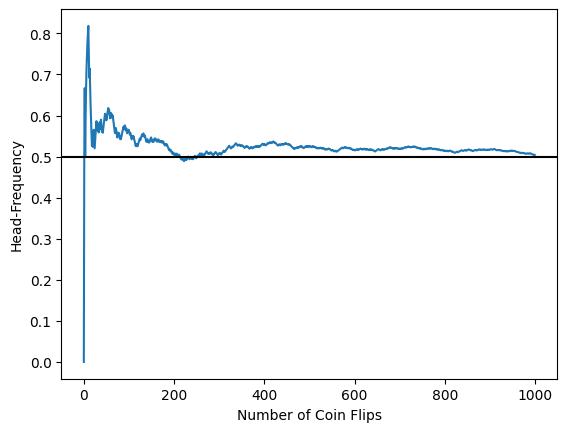

In [8]:
# 导入 matplotlib
import matplotlib.pyplot as plt

# 尝试投掷硬币 1000 次会发生什么
np.random.seed(0)

coin_flips = []
frequencies = []

for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))  # 每次投掷的结果都会添加到 coin_flips中
    frequencies.append(frequency_heads(coin_flips))  # 每次添加一个结果，就会计算一次heads的占比，然后将占比数值添加到frequencies中

plt.plot(list(range(1000)), frequencies)  # list(range(1000)) 为 x 轴的值
plt.axhline(0.5, color = "k")
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

从上图可以发现，head出现的频率随着投掷数量的增加，开始不断的趋近0.5。

### 分析有偏差硬币

In [9]:
# 假设一个硬币在统计上会出现70%的次数都是正面朝上的
# 我们可以这么做
np.random.binomial(1, 0.7)  # 1：投硬币的次数，0.7期望得到抛硬币的概率

1

`np.random.binomial(1, 0.7)` 是使用二项分布随机生成一个值的函数调用。让我来解释一下这个函数的参数和作用：

- `np.random`：这是 `numpy` 模块的子模块，用于生成随机数。
- `binomial(n, p)`：这是二项分布函数，用于模拟二项分布随机变量的生成。
  - `n`：表示试验次数或重复次数。在这里，你使用 `1`，因为你只关心一次投掷。
  - `p`：表示单次试验成功的概率。在这里，你使用 `0.7`，因为你假设硬币朝上的概率是 70%。

所以，`np.random.binomial(1, 0.7)` 的作用是模拟一次硬币投掷，其中成功（正面朝上）的概率为 0.7，失败（反面朝上）的概率为 0.3。这个函数将返回 `1`（成功）或 `0`（失败）中的一个值，以模拟硬币投掷的结果。

In [10]:
# 开始模拟有偏硬币的投掷实验
np.random.seed(0)

print("Let's flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'head' if coin_flip == 1 else 'tails'}.")

print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)  # 十次，70%概率

print((f"{head_count} heads were ovserved out of "
    f"{number_coin_flips} biased coin flips"))

Let's flip the biased coin once.
Biased coin landed on head.

Let's flip the biased coin 10 times.
6 heads were ovserved out of 10 biased coin flips


接着开始尝试投掷1000次：

In [11]:
np.random.seed(0)

head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


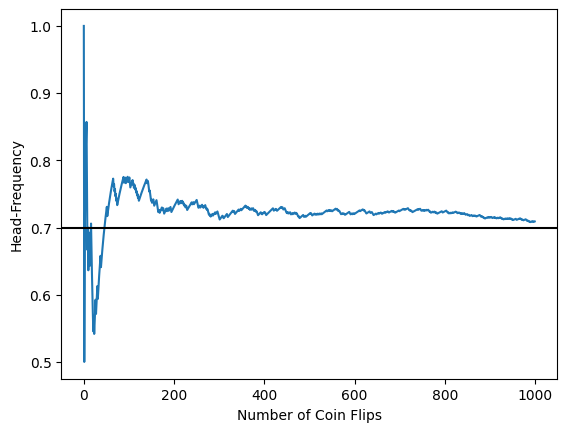

In [12]:
# 使用先前的代码
# 尝试投掷硬币 1000 次会发生什么
np.random.seed(0)

coin_flips = []
frequencies = []

for _ in range(1000):
    coin_flips.append(np.random.binomial(1, 0.7))  # 每次投掷的结果都会添加到 coin_flips中
    frequencies.append(frequency_heads(coin_flips))  # 每次添加一个结果，就会计算一次heads的占比，然后将占比数值添加到frequencies中

plt.plot(list(range(1000)), frequencies)  # list(range(1000)) 为 x 轴的值
plt.axhline(0.7, color = "k")
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

In [13]:
# 重新计算投掷硬币的频率收敛
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697

for i in range(1, 6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability! \n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability! 

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


上面代码进行了5次迭代，并且每次迭代都投掷了硬币1000次，可以发现只有一次投硬币正面朝上的概率恰好和设置的概率预期一致。

可视化也证明了这一点。

## 使用直方图和NumPy数组计算置信区间

### 有偏差硬币的置信区间计算

假如我们有一枚有偏差硬币，但是不知道偏频率是多少。

我们投掷了1000次，得到的结果为0.709，这个频率接近了实际概率，但是具体是多少？

准确点儿来讲：硬币落在0.709区间，也就是0.7~0.71之间的区间的概率有多大？

In [14]:
# 对每个样本进行500次迭代
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

这段代码使用了二项分布来模拟进行了500次独立的试验，每次试验投掷了1000次硬币，成功（"head"）的概率为0.7。它生成了一个列表 `head_count_list`，其中包含了500个元素，每个元素表示对应试验中成功（正面朝上）的次数。

这段代码的意义在于模拟500次投掷1000次硬币的实验，来观察在不同实验中成功（"head"）的次数的变化。实际结果会在一定程度上受到随机性的影响，但由于大量的试验次数（500次）和每次试验的投掷次数（1000次），预计成功次数会接近于理论成功概率的70%。

In [15]:
# 或者另一种写法
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [16]:
# 这两者除了类型，数值其实是相同的
assert head_count_array.tolist() == head_count_list

In [17]:
# 或者转换为数值等价的NumPy的数组
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

NumPy 数组和 Python 自带的列表（array）之间有一些显著的区别和优势，主要体现在以下几个方面：

1. **性能：** NumPy 数组是由 C 语言编写的底层库实现的，因此在计算密集型任务中通常比 Python 自带的列表更快。它们使用连续的内存块来存储数据，这有助于优化内存访问和计算。

2. **功能丰富：** NumPy 提供了广泛的数学、逻辑和统计函数，以及多维数组操作。这使得在处理科学计算、数据分析和数值计算时更加方便。与此相比，Python 自带的列表并没有提供这么多的数学和统计功能。

3. **多维数组：** NumPy 数组可以是多维的，这使得它们非常适合处理矩阵和多维数据。这在科学计算和数据分析中经常用到。

4. **广播（Broadcasting）：** NumPy 允许在不进行显式循环的情况下对不同形状的数组进行操作，这称为广播。这在处理不同维度的数据时非常方便。

5. **内存效率：** 由于 NumPy 数组使用的是连续的内存块，所以它们相对于 Python 列表来说更加内存有效，特别是在处理大规模数据时。

6. **向量化操作：** NumPy 支持向量化操作，即可以一次性对整个数组进行操作，而不需要显式地使用循环。这可以提高代码的可读性和性能。

7. **广泛的库支持：** 许多科学计算和数据分析的库都建立在 NumPy 基础之上，如 SciPy、Pandas、Matplotlib 等，因此使用 NumPy 可以更好地集成这些库。

总之，NumPy 数组在处理数值数据和执行数学运算方面具有明显的优势，尤其在科学计算、数据分析、机器学习和统计分析等领域中非常有用。

In [18]:
# 广播机制
arr = np.array([1, 2, 3, 4, 5])
scalar = 2

result = arr + scalar
print(result)

[3 4 5 6 7]


In [19]:
# 使用numpy计算概率
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000
                                    for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000,
                                            head_count_list))

用于运行随机模拟的使用NumPy方法：
- np.random.randint(x, y)：返回一个x~y之间的随机整数，但是不包括y
- np.random.binomial(1, p)：返回1或者0的随机值，等于1的可能性为p
- np.random.binomial(x, p)：运行np.random.binomial(1, p)的x迭代并且返回求和结果。返回的值为跨x个样本的非0观察数
- np.random.binomial(x, p, size = y)：返回一个包含y个元素的数组，每个数组元素等于np.random.binomial(x, p)的随机输出
- np.random.binomial(x, p, size = y)/x：返回一个包含y个元素的数组，每个元素代表跨x个样本的非0观察数的频率

In [20]:
# 获得前20个采样频率
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [21]:
# 查看最大值和最小值
min_freq = frequency_array.min()
max_freq = frequency_array.max()

print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")

print(f"Difference across frequenct range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequenct range: 0.07699999999999996


由此我们可以认为0.656~0.733的频率范围内的某处是正面朝上的真实概率。

但是这个区间的跨度非常的大，最大和最小采样值之间的差异超过了7%。

通过绘制所有单个频率与其出现次数的关系缩小频率范围：

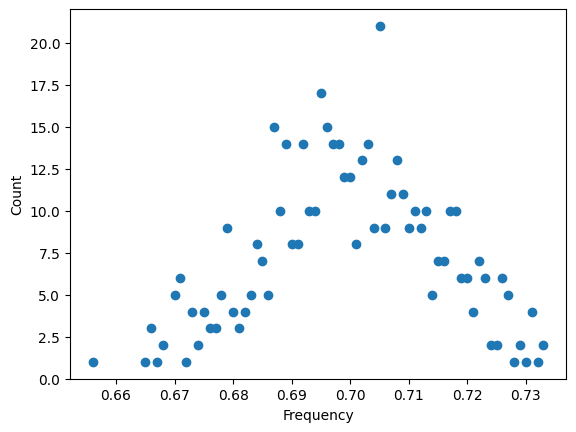

In [22]:
from collections import defaultdict

frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

通过可视化，可以观察到：接近0.7的频率出现的次数最多。

但是这个图也有缺点：因为几乎相同的频率在图表中显示为重叠点。

一个好的方法是：将这些临近频率组合在一起，而不是将他们视作是单独的点。

### 通过直方图合并相临近值

尝试将临近的频率合并在一起，尝试优化图标输出：

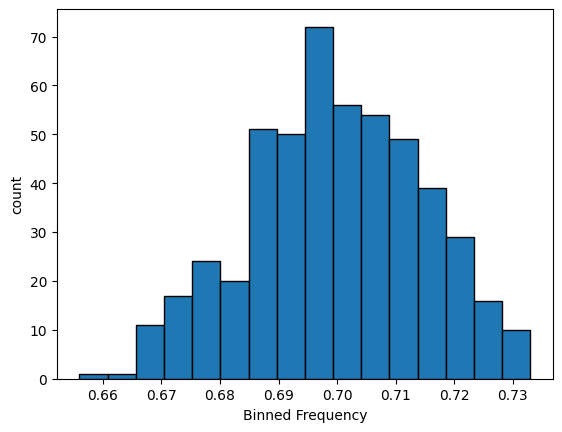

In [23]:
# 将频率范围细分为n个等距的bin
# 然后将所有频率值放入到它们对应的bin中
plt.hist(frequency_array, bins = "auto", edgecolor = "black")
plt.xlabel("Binned Frequency")
plt.ylabel("count")
plt.show()

bins = "atuo" 能够让matplotlib自动优化bins的数量。

在绘制的直方图中，可以发现频率技术最高的bin介于0.69~0.70之间。

这个bin明显高于了其他十几个bin。

可以使用counts获得更精准的bin技术，这是plt.hist返回的numpy数组。

Number of Bins: 16


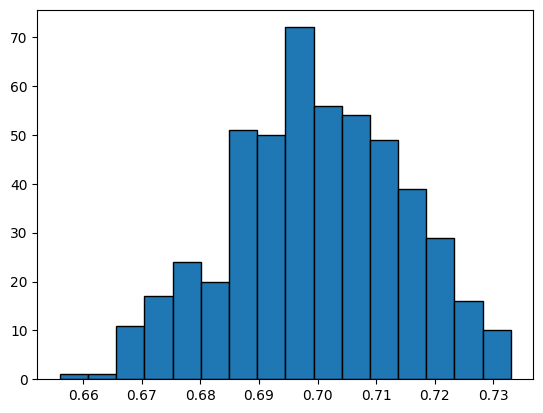

In [24]:
counts, _, _,  = plt.hist(frequency_array, bins = "auto",
                          edgecolor = "black")

print(f"Number of Bins: {counts.size}")

直方图中有16个bin，每个bin的宽度可以通过将range的值除以16来获得。

或者我们可以通过bin_edges数组来进行计算：

Bin width: 0.004812499999999997


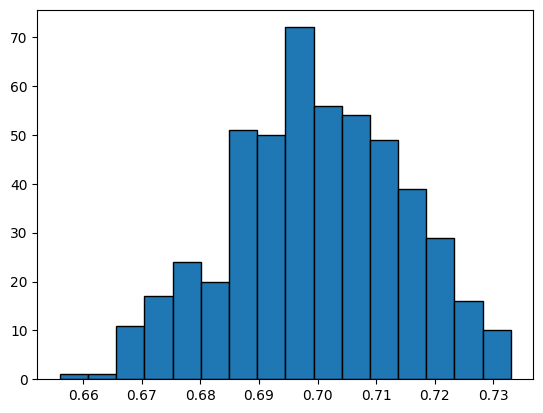

In [25]:
counts, bin_edges, _ = plt.hist(frequency_array, bins = "auto",
                                edgecolor = "black")

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq -  min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [26]:
# 获取 bin 的频率和大小
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "
    f"{count} element {'' if count == 1 else 's'}"))

In [27]:
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element 
The bin for frequency range 0.6800625 - 0.684875 contains 20 element s


计算直方图中最高峰的计数和频率范围。

为此，需要获得 counts.max() 的索引，方便的是，NumPy数组有一内置的argmax方法，它可以返回数组中最大值的索引。

In [28]:
assert counts[counts.argmax()] == counts.max()

In [29]:
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 element s


### 利用直方图进行概率推导

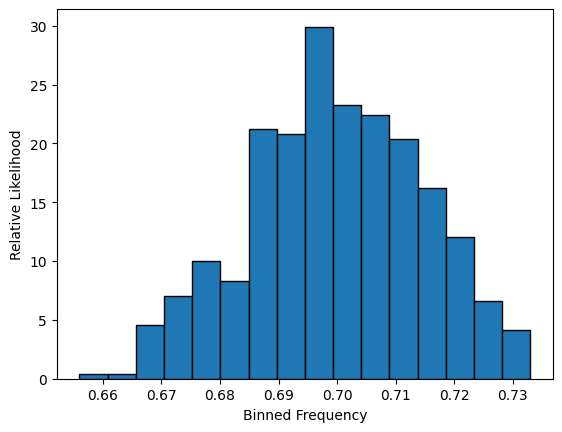

In [30]:
likelihoods, bin_edges, _  = plt.hist(frequency_array, bins = "auto",
                                      edgecolor = "black", density = True)

plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

相对似然指一个面积总和为1.0的图中的y的值。

In [31]:
# 证明
assert likelihoods.sum() * bin_width == 1.0

直方图的面积总和为1.0，因此，其峰值下方的面积现在等于随机采样频率落在0.694~0.699区间范围内的概率。

通过计算位于likelihoods.argmax()的bin的面积得到这个值：

In [32]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index + 1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} withprobability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 withprobability 0.144


概率为14%，这个值非常的低，但是可以通过将区间范围扩大到多个bin来增加它。

In [33]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"

print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


这三个bin覆盖大约0.689~0.704的频率范围，他们的相关概率为0.464.

因此，3个bin代表了统计学家所说的46.4%的置信区间。我们有46.4%的信心让真实概率落在3个bin的范围内。

从统计上来讲，这个置信度较低，统计学上更加的倾向于95%或者更高的置信区间。

In [34]:
# 通过拓展最左边的和最右边的bin来获得更高的置信区间
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1

    # 95% 或者以上的置信区间
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods. size - 1:
            end_index += 1

        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "
    f"{100 * area:.2f} % confidence interval"))

    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40 % confidence interval


(3, 14)

大约0.670~0.723的频率范围提供了95.4%的置信区间。

因此，1000次有偏硬币投掷的采样序列应该在95.4%的时间里落在该范围之内。

我们可以确信：真实概率介于0.670~0.723之间，但是无法确定真实概率是接近0.67还是0.72。

这个范围需要进行进一步的缩小。

### 缩小较高置信区间的范围

如何在保持95%的置信区间的同时缩小范围呢？

或许可以将迭代次数从500提升到更高。

现在采取的方法：在保持每次迭代实验进行 1000次 硬币投掷不变的情况之下，执行 100000 次频率采样。

In [35]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42 % confidence interval


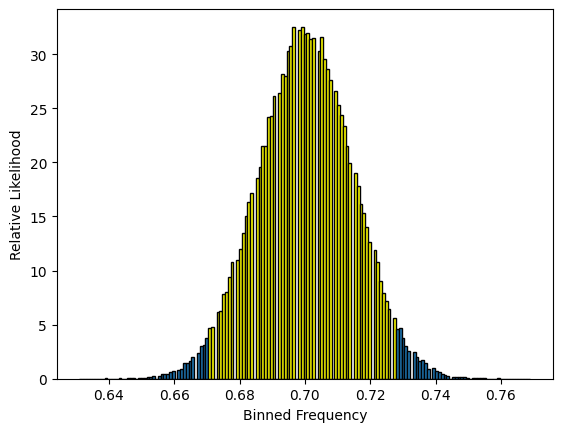

In [36]:
# 对直方图进行着色
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins = "auto",
                                           edgecolor = "black", density = True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor("yellow")

plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")

plt.show()

重新计算的直方图类似于对称的种形曲线，许多的直方图条已经使用set_facecolor()方法来突出显示。

突出显示的黄色直方图表示了95%的置信区间，该区间涵盖大约0.670~0.727的频率范围。

重点：增加频率样本大小并没有减少频率范围。

证明：

> 增加频率样本大小通常不会直接导致频率范围的减少。频率样本大小是指在一定时间内收集到的频率数据点数量，而频率范围是指数据中涵盖的频率的范围。增加频率样本大小通常意味着收集更多的频率数据点，这可以使你更全面地了解频率分布和特征。例如，如果你在某个频率范围内只有少量的数据点，增加样本大小可以提供更多信息，帮助你更准确地分析频率特征。
然而，频率范围的确定可能受到数据收集的限制。如果你只在特定的频率范围内收集数据，那么无论你的样本大小如何增加，你都不会获得超出这个范围的频率信息。要扩展频率范围，你需要在更广泛的频率范围内进行数据收集。
总之，增加频率样本大小通常会提供更多的频率信息，但要扩展频率范围则需要在更广泛的范围内收集数据。

接着我们尝试将投硬币的次数从1000次增加到50000次，并且同时维持频率样本大小不变，稳定在100000，这将最终导致50亿次抛硬币。

The frequency range 0.695769 - 0.703708 represents a 95.06 % confidence interval


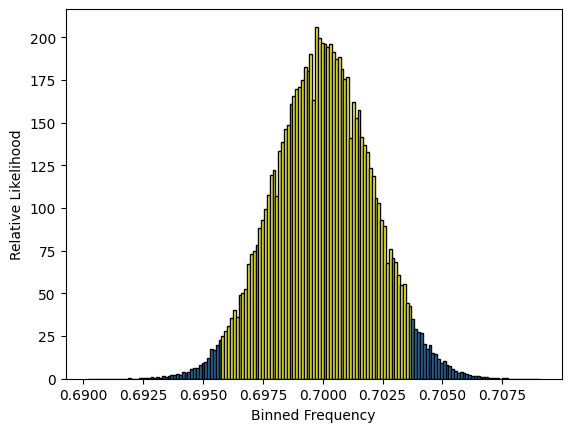

In [37]:
np.random.seed(0)

head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins = "auto",
                                          edgecolor = "black", density = True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor("yellow")

plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")

plt.show()

新的95.06%的置信区间的范围为：0.695~0.703，如果四舍五入到两位小数，那么大致上就是0.7。


增加实验次数可以缩小置信区域的范围，这是由于统计学中的中心极限定理所导致的。中心极限定理是一条重要的统计学原理，它指出当从总体中随机抽取样本并计算样本均值时，随着样本数量的增加，样本均值的分布会逐渐趋近于正态分布。

当实验次数增加时，你实际上在收集更多的样本，并计算出更多个样本均值。根据中心极限定理，这些样本均值的分布将趋近于正态分布，均值接近总体均值，而标准误差（样本均值的标准差）会减小。这意味着随着实验次数的增加，你会看到更多的样本均值集中在总体均值附近，置信区域会变得更加紧密。

换句话说，增加实验次数会减小样本均值的变异性，从而减小置信区域的范围。置信区域表示了我们对总体参数（比如均值）的估计的不确定性。通过增加实验次数，我们减小了对样本均值估计的不确定性，从而可以更精确地确定置信区域的范围。

需要注意的是，中心极限定理在一些条件下成立，特别是样本量足够大的情况下。因此，在应用中心极限定理时，需要考虑样本量是否足够大以满足这些条件。

中心极限定理（Central Limit Theorem，CLT）是统计学中的一个重要定理，它描述了当从任何总体中抽取足够大的样本，并计算样本的均值时，这些样本均值的分布会趋近于正态分布，无论总体分布如何。中心极限定理的重要性在于，它使得我们可以在许多情况下使用正态分布来近似处理样本均值，而无需了解总体分布的具体情况。

中心极限定理通常可以用以下方式陈述：

假设从一个具有任何形状的总体中随机抽取独立同分布的样本，样本大小为 n。当 n 足够大时（通常 n ≥ 30），样本均值的分布会接近于正态分布，均值等于总体均值，标准差等于总体标准差除以√n。

数学证明中心极限定理是相对复杂的，涉及大量的概率论和数学推导。

**例子：掷硬币实验**

假设你有一个公平的硬币，正面和反面出现的概率均为 0.5。现在，你开始进行大量次数的掷硬币实验，并每次记录正面出现的次数。每次实验都是一个独立的随机事件。

根据中心极限定理，随着实验次数的增加，正面出现次数的分布会趋近于正态分布。这意味着在足够多的实验次数后，你会看到正面出现次数集中在某个范围内，形成一个正态分布的曲线。

虽然掷硬币的结果不是连续的，而是离散的，但是由于实验次数足够大，根据中心极限定理，样本均值的分布仍会趋近于正态分布。这就是中心极限定理的直观示例，展示了它如何在实际问题中发挥作用。

请注意，虽然中心极限定理在许多情况下成立，但并非适用于所有情况。在应用中心极限定理时，还需要考虑样本大小是否足够大以及其他条件是否满足。

中心极限定理给与我们的观察完全一致：
- 最初对1000次抛硬币进行了500次采样
- 将每次实验投掷1000次硬币的结果转换为频率
- 绘制500个频率的直方图，代表50000次硬币投掷、
- 直方图形状不对称，它在大约0.7处达到高峰
- 将频率技术从500增加到100000
- 绘制100000个频率的直方图，代表100万次隐蔽投掷
- 新的直方图形状类似正态曲线，它继续在0.7处达到峰值
- 不断将峰值周围的bin添加进来并且对这些bin的面积进行求和
- 这些bin代表大约0.670~0.723的频率范围
- 将每次实验抛掷1000次硬币加到每次实验投掷50000次硬币
- 绘制100000个频率的直方图，代表50亿次硬币抛掷
- 更新后的直方图的形状仍然类似于正太曲线
- 重新计算覆盖95%的直方图面积的频率范围
- 频率范围宽度缩小到大约0.695~0.703
- 因此：每增加每次实验投掷硬币的次数时，可能频率的范围开始缩小到0.7左右

### 在NumPy中计算直方图

常用的直方图函数。

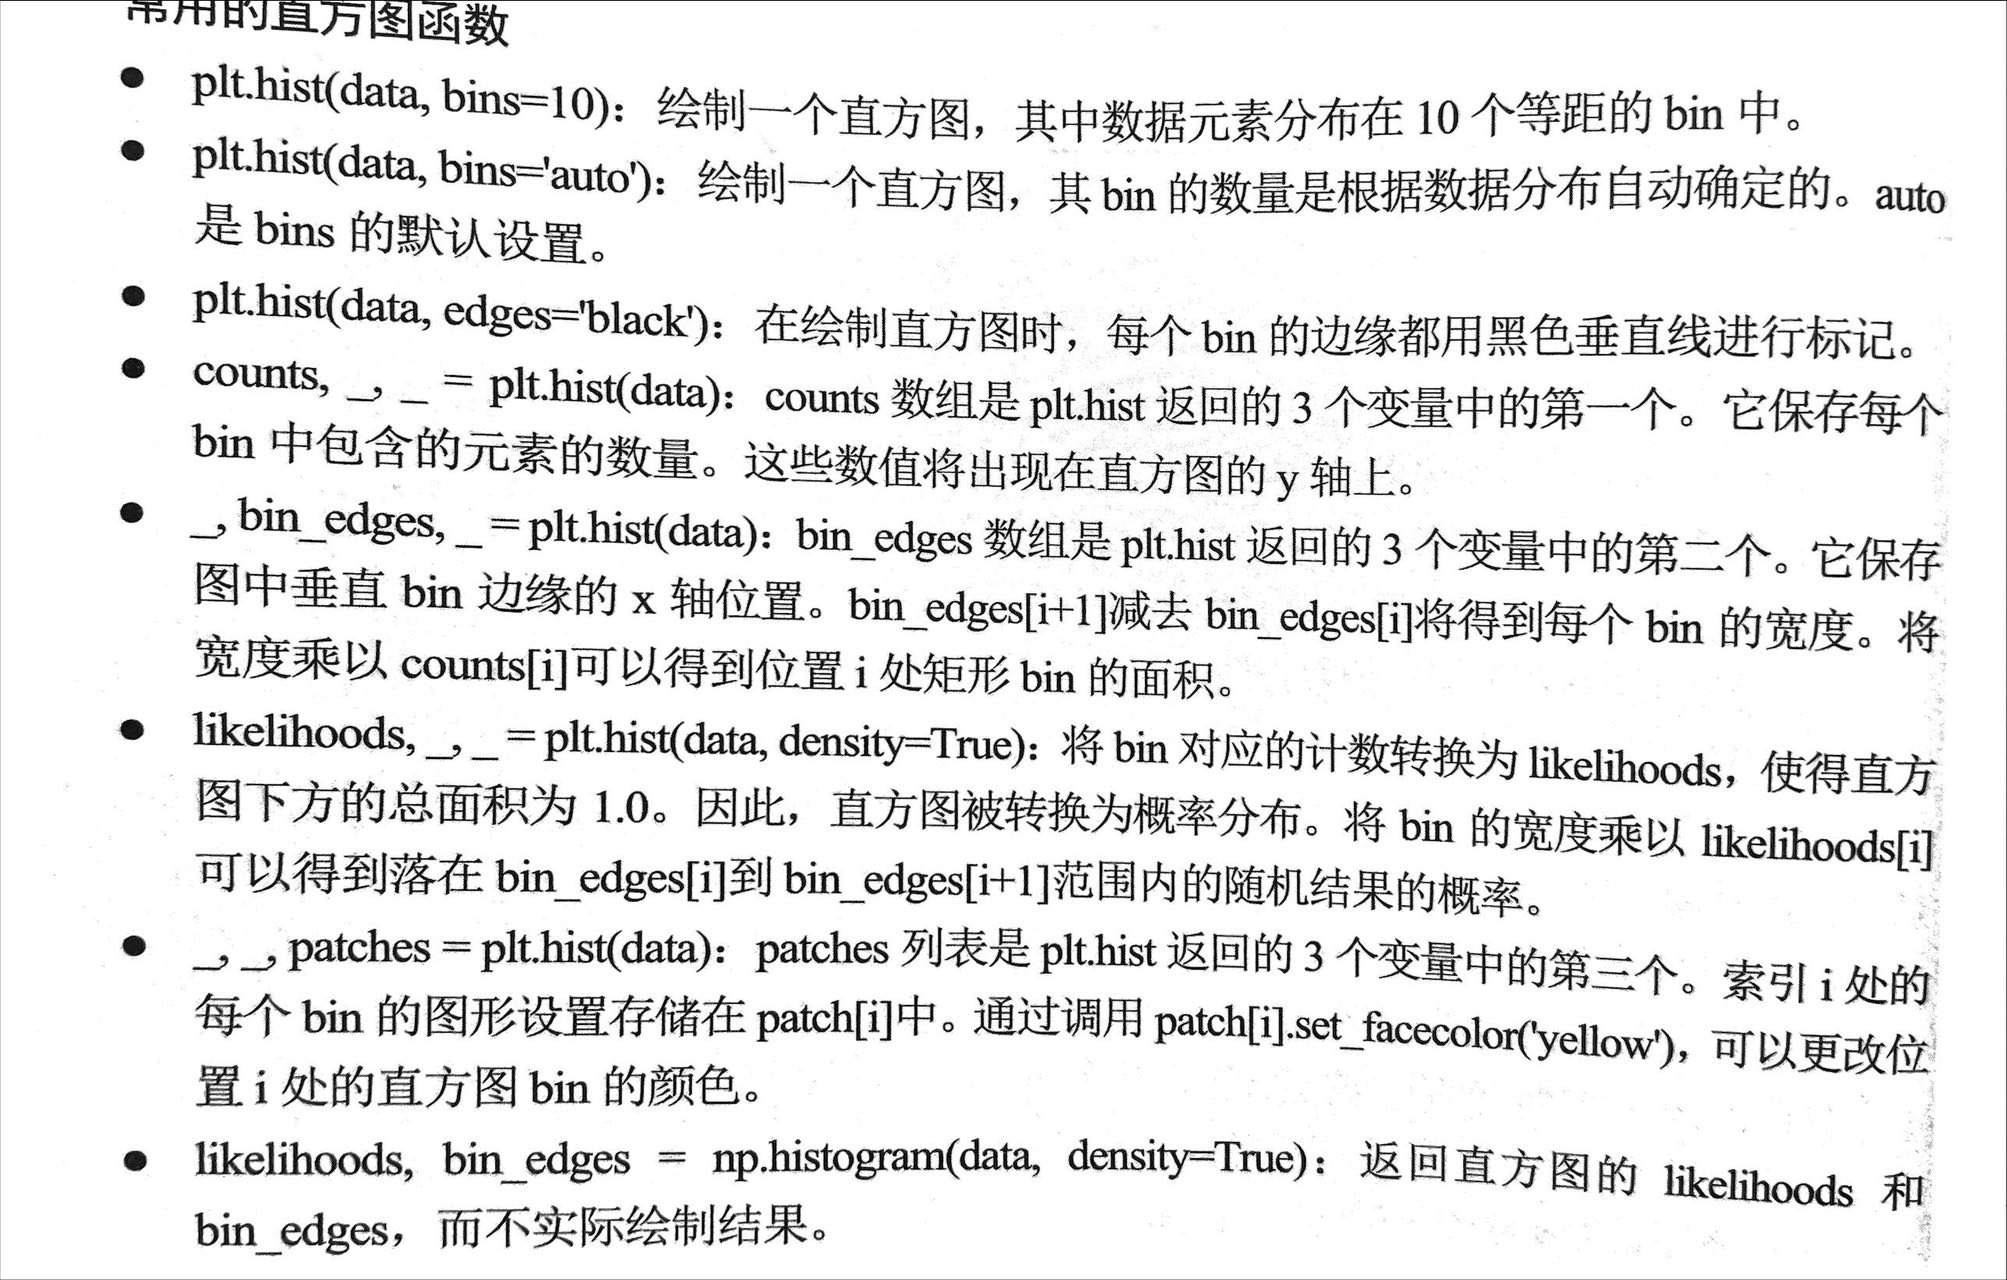

## 使用置信区间分析一副有偏纸牌

假如有一副有偏的52张指纸牌，每张牌不是红牌就是黑牌，但是数量不对等。

现在进行这样的实验：每次抽一张牌，可以记录这张牌的颜色，但是如果想要知道下一张牌的颜色，就需要将牌放回去和进行洗牌。

In [38]:
# 首先生成这样的一副牌
np.random.seed(0)  # 随机数种子
total_cards = 52  # 牌的总数
red_card_count = np.random.randint(0, total_cards + 1)  # 生成随机数量的红牌

In [39]:
# 接着是黑牌的数量
black_card_count = total_cards - red_card_count  # 总共52张

In [40]:
# 由于这是有偏的牌，所以两者不能够是相等的
assert red_card_count != black_card_count

由于牌的颜色不是红色就是黑色，所以样本空间可以认为是{'red_card', 'black_card'}，但是问题在于红牌和黑牌的数量是不一致的，所以这里需要的是一个加权的样本空间字典，其中字典的值等于纸牌的数量。

In [42]:
def get_matching_event(event_condition, sample_space):  # 两个参数：事件条件，样本空间
    return set([outcome for outcome in sample_space if event_condition(outcome)])  # event_condition(outcome) 其实是调用了event_condition()函数，

# 定义广义事件概率函数
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space)  == type(set()):  # 这里将会检查generic_sample_space是否是一个集合，因为除了空集，其他的情况之下传入的是一个字典，键值对表示了事件的权重
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome]
                     for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [43]:
# 创建键所对应的值
weighted_sample_space = {'red_card' : red_card_count,
                         'black_card': black_card_count}

prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)

In [45]:
# 检测一下
assert prob_red == red_card_count / total_cards

In [46]:
# 接着使用 binomial 来进行模拟
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


In [47]:
# 模拟10次翻牌
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


10次抽牌的结果是8张红牌，但是这并不能够说明80%的都是红牌，这一点在之前的投硬币实验中已经验证过了，当硬币是无偏硬币的时候，10次出现8次正面朝上的概率为10%。

这里采取大规模采样来进行实验：每次实验进行50000次洗牌和翻牌，并且执行100000次实验。

In [48]:
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins = 'auto', density = True)
bin_width = bin_edges[1] - bin_edges[0]

start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.842865 - 0.849139 represents a 95.16 % confidence interval


从上面的结果来看，我们非常的有信心 prob_red 位于 0.842865~0.849139之间，也知道prob_red等于red_card_count/total_cards, 因此，red_card_count等于prob_red*total_cards。

此外，red_card_count是整数，所以需要将范围的端点四舍五入到最接近的整数。

In [49]:
range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


In [52]:
if red_card_count == 44:
    print(f"We are correct! There are 44 red cards in the deck.")
else:
    print(f"Oops! Our sampling estimation was wrong.")

We are correct! There are 44 red cards in the deck.


这副牌中确实有44张的红牌。

## 使用排列来洗牌

洗牌需要打乱一副牌中的所有纸牌。

In [53]:
np.random.seed(10)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 1, 0, 1]


shuffle()方法重新排列了card_deck中的元素，需要注意的是这个方法是原地打乱对象。

np.random.shuffle()函数是NumPy库中用于原地（in-place）打乱数组元素顺序的函数。原地操作意味着它会直接修改传入的数组，而不会返回一个新的打乱后的数组。这对于需要对数据进行洗牌操作时非常有用，比如在机器学习中划分训练集和测试集，或者在实现随机算法时。

In [54]:
# 如果要保留一个原有的对象作为副本
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


元素的随机排列在数学上称为排列，通常情况之下，随机排列与原始排列并不相同。但是在极少数情况之下，它们可能等于原始，为打乱的排列。

随机排列之后序列完全等于unshuffled_deck的概率是多少？

可以采用采样方法计算这个概率，因为只有4个元素，所以可以采用样本空间进行分析。

构造样本分析需要循环遍历所有可能的牌组排列，可以使用 itertools.permutations 函数来实现。

使用 itertools.permutations(unshuffled_deck) 将返回所有的可能的排列情况：

In [55]:
import itertools

for permutation in list(itertools.permutations(unshuffled_deck))[:3]:  # 这里只输出前3个结果
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


这些排列被输出为Python元组，而不是数组或者列表。

第一个排列和第二个排列彼此相同，因为第一个排列只是原始的unshuffled_deck，没有重新排列的元素，在生成一个新的排列的时候，将第一个排列的第三个位置的元素和第四个位置的元素进行了相互交换，从而得到了第二个排列，只是第一个排列的第三个位置和第四个位置的元素的值相同，所以第二个排列和第一个排列呈现出了相同的结果。

In [56]:
# 可以进行验证
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


In [57]:
# 如果要输出所有的结果，可以不进行切片操作
for permutation in list(itertools.permutations([0, 1, 2, 3])):
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)
(0, 2, 3, 1)
(0, 3, 1, 2)
(0, 3, 2, 1)
(1, 0, 2, 3)
(1, 0, 3, 2)
(1, 2, 0, 3)
(1, 2, 3, 0)
(1, 3, 0, 2)
(1, 3, 2, 0)
(2, 0, 1, 3)
(2, 0, 3, 1)
(2, 1, 0, 3)
(2, 1, 3, 0)
(2, 3, 0, 1)
(2, 3, 1, 0)
(3, 0, 1, 2)
(3, 0, 2, 1)
(3, 1, 0, 2)
(3, 1, 2, 0)
(3, 2, 0, 1)
(3, 2, 1, 0)


所有的排列都以先提供的频率发生，因此，所有的排列的可能性都是相同的，并不需要加权样本空间。

In [60]:
# 计算排列概率
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that s shuffle does not alter the deck is {prob}")

Probability that s shuffle does not alter the deck is 0.16666666666666666
